# K-Means clustering on a Riemannian Manifold

Lead authors: Thomas Gerald and Hadi Zaatiti.

In this notebook, we demonstrate how run a K-mean clustering algorithm on a Riemannian Manifold. Generate data on a sphere from a Von Mises Fisher distribution and apply a rotation sampled randomly from SO3.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import geomstats.backend as gs
import geomstats.visualization as visualization
from geomstats.geometry.hypersphere import Hypersphere
from geomstats.geometry.special_orthogonal import SpecialOrthogonal

np.random.seed(1)
gs.random.seed(1000)

INFO: Using numpy backend


## Data init: Generate clusters randomly on the sphere

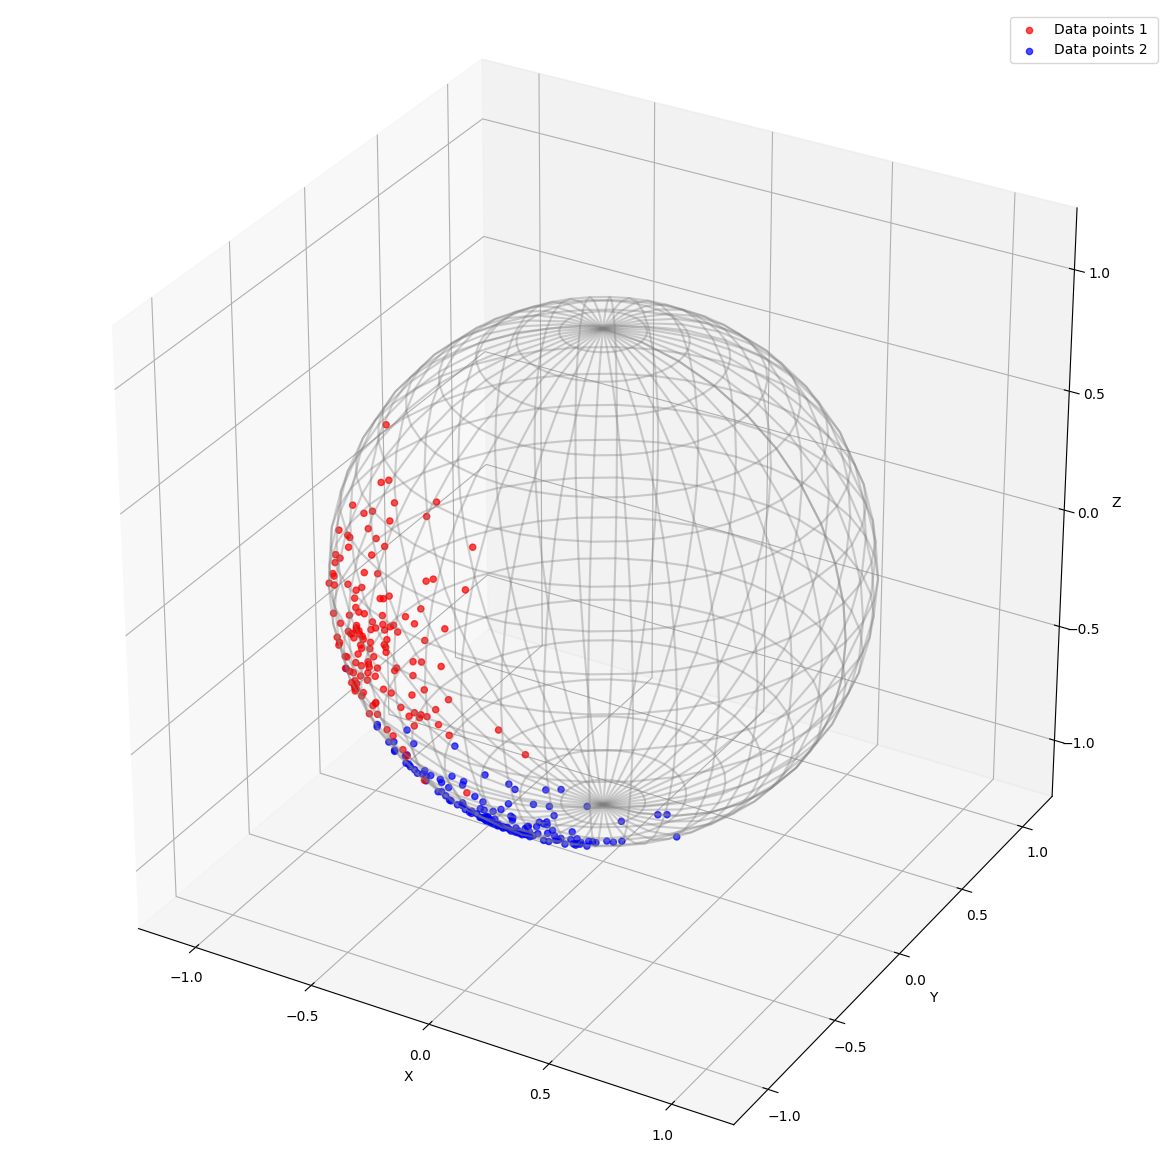

In [2]:
sphere = Hypersphere(dim=2, equip=False)
cluster = sphere.random_von_mises_fisher(kappa=20, n_samples=140)

SO3 = SpecialOrthogonal(3, equip=False)
rotation1 = SO3.random_uniform()
rotation2 = SO3.random_uniform()

cluster_1 = cluster @ rotation1
cluster_2 = cluster @ rotation2

fig = plt.figure(figsize=(15, 15))
ax = visualization.plot(
    cluster_1, space="S2", color="red", alpha=0.7, label="Data points 1 "
)
ax = visualization.plot(
    cluster_2, space="S2", ax=ax, color="blue", alpha=0.7, label="Data points 2"
)
ax.auto_scale_xyz([-1, 1], [-1, 1], [-1, 1])
ax.legend();

## Operate Riemannian K-Means clustering 

In [3]:
from geomstats.learning.kmeans import RiemannianKMeans
from geomstats.geometry.hypersphere import Hypersphere

manifold = Hypersphere(dim=2)

data = gs.concatenate((cluster_1, cluster_2), axis=0)

kmeans = RiemannianKMeans(manifold, 2, tol=1e-3)
kmeans.fit(data)
labels = kmeans.labels_
cluster_centers = kmeans.cluster_centers_

Plot the results:

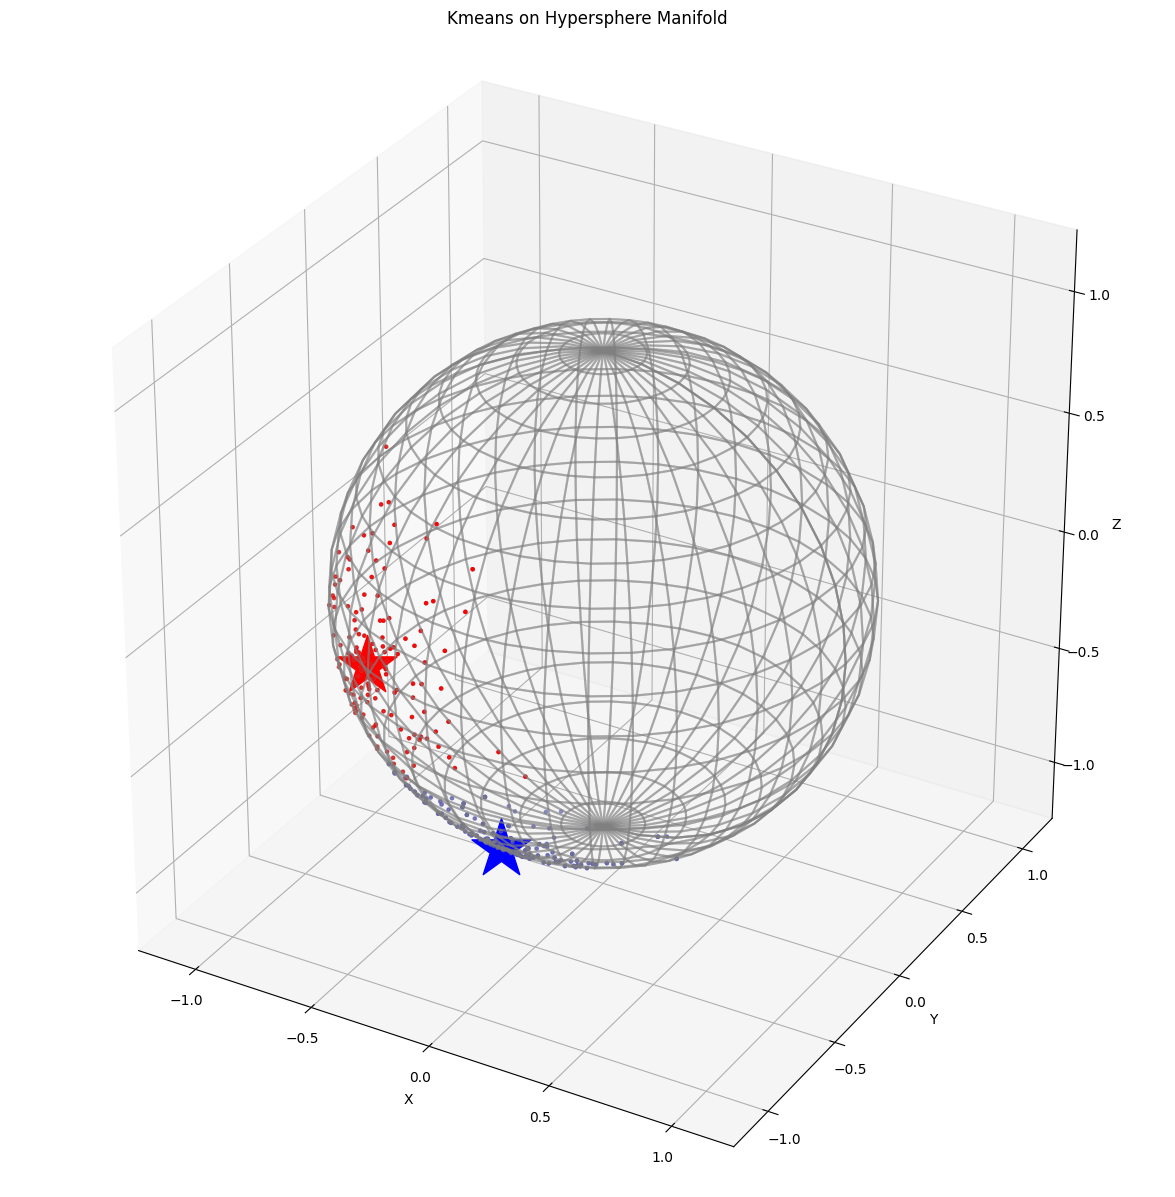

In [4]:
fig = plt.figure(figsize=(15, 15))
colors = ["red", "blue"]

ax = visualization.plot(data, space="S2", marker=".", color="grey")

for i in range(2):
    ax = visualization.plot(
        points=data[labels == i], ax=ax, space="S2", marker=".", color=colors[i]
    )

for i, c in enumerate(cluster_centers):
    ax = visualization.plot(c, ax=ax, space="S2", marker="*", s=2000, color=colors[i])

ax.set_title("Kmeans on Hypersphere Manifold")
ax.auto_scale_xyz([-1, 1], [-1, 1], [-1, 1])